In [71]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import kde
import seaborn as sns
from matplotlib.pyplot import cm 


import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

In [2]:
spots_dj = Spot.objects.filter(spot_collection__sid = "quant1")
spots = spots_dj.filter(raw_spot__raw_spot_collection__studies__sid__in=["microarray_2018_03_21"])
data_2018_03_21 = a2.Data(spots)
spots = spots_dj.filter(raw_spot__raw_spot_collection__studies__sid__in=["microarray_2018_02_18"])
data_2018_02_18 = a2.Data(spots)
spots = spots_dj.filter(raw_spot__raw_spot_collection__studies__sid__in=["microarray_2018_01_24"])
data_2018_01_24 = a2.Data(spots)

/home/janek89/Dev/flutype_analysis_web/analysis2.py:128: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Test", row)
/home/janek89/Dev/flutype_analysis_web/analysis2.py:129: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Train", tuple(set(cs) - set(row)))


In [14]:
def spot_quality_collection(this_data):
    all_collections = this_data.spots_pd.Collection.dropna().unique()
    frames=[]
    for i in np.linspace(0.001,0.8,30):
        for c in all_collections:
            spots_dj = Spot.objects.filter(spot_collection__sid = "quant1")
            spots_dj = spots_dj.filter(raw_spot__raw_spot_collection__sid__in=[c])
            max_spots = len(spots_dj)
            spots_dj = spots_dj.filter(circle_quality__gte = i)
            frames.append(pd.Series(data=[c,i,len(spots_dj)], index=["Collection","Circle Quality","Number"]))
    d_circ = pd.concat(frames,axis=1).T
    d_circ.Number = d_circ.Number.astype(int)/ max_spots
    spot_amount = pd.pivot_table(d_circ,values=["Number"],columns=["Collection"],index=["Circle Quality"])
    return  spot_amount[list(spot_amount.iloc[15].sort_values(ascending=False).index)]

In [15]:
spot_amount_3 = spot_quality_collection(data_2018_03_21)
spot_amount_2 = spot_quality_collection(data_2018_02_18)

In [16]:
spot_amount_1 = spot_quality_collection(data_2018_01_24)


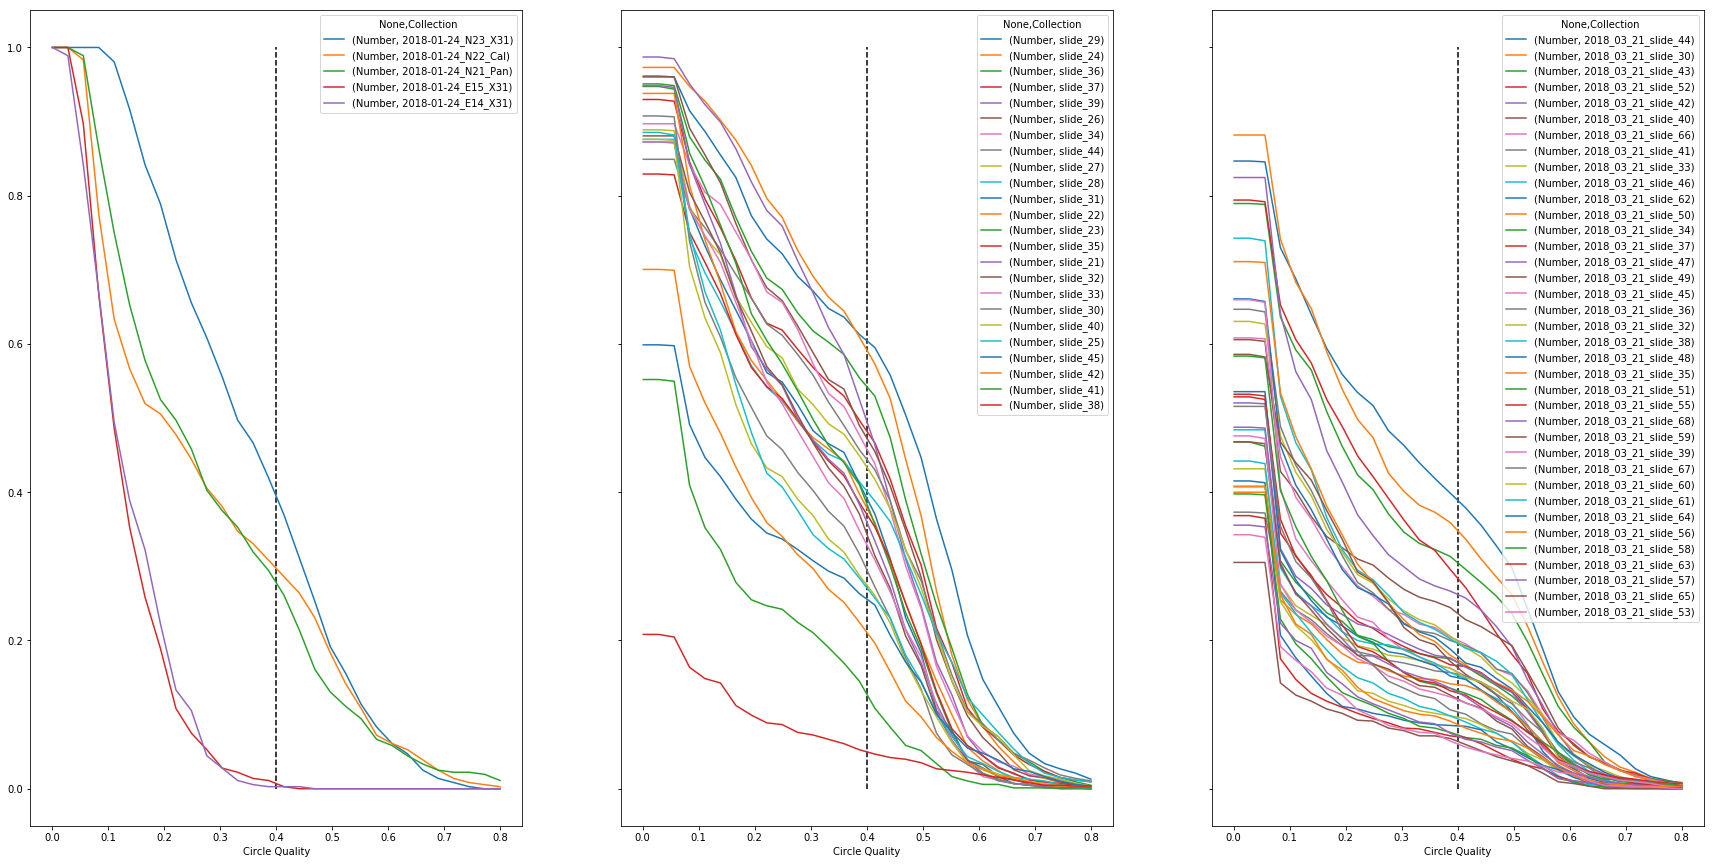

In [24]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(30,15), sharey=True)
spot_amount_1.plot(ax = axes[0])
spot_amount_2.plot(ax = axes[1])
spot_amount_3.plot(ax = axes[2])
for ax in axes:
    ax.vlines(0.4,0,1, linestyles="--")


plt.show()

In [47]:
data_2018_03_21clean = data_2018_03_21.spots_pd.dropna(how="all")

In [48]:
data_2018_03_21clean["Analyte Batch"] = "Unkown"


/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
data_clean = a2.Data(spots_pd=data_2018_03_21clean)

/home/janek89/Dev/flutype_analysis_web/analysis2.py:128: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Test", row)
/home/janek89/Dev/flutype_analysis_web/analysis2.py:129: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Train", tuple(set(cs) - set(row)))


In [50]:
data_clean_sampled = data_clean.sample_on_collection(20)

/home/janek89/Dev/flutype_analysis_web/analysis2.py:128: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Test", row)
/home/janek89/Dev/flutype_analysis_web/analysis2.py:129: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Train", tuple(set(cs) - set(row)))


In [40]:
data1 = pd.DataFrame(data_clean_sampled.x_pca_fit().transform(data_clean_sampled.x)[:,:2],index=data_clean_sampled.x.index , columns =["Principle 1", "Principle 2"])


37

In [75]:
def lda_plot(data, ax,contour=False, **kwargs):
    data.groupby("Collection")
    n = len(data1.groupby("Collection"))
    color=iter(cm.rainbow(np.linspace(0,1,n)))

    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for n, d in data.groupby("Collection"):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, label=n,ax=ax ,  c=next(color) , shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2", ax=ax,    c=next(color), label=n,**kwargs)
from matplotlib.lines import Line2D

        

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


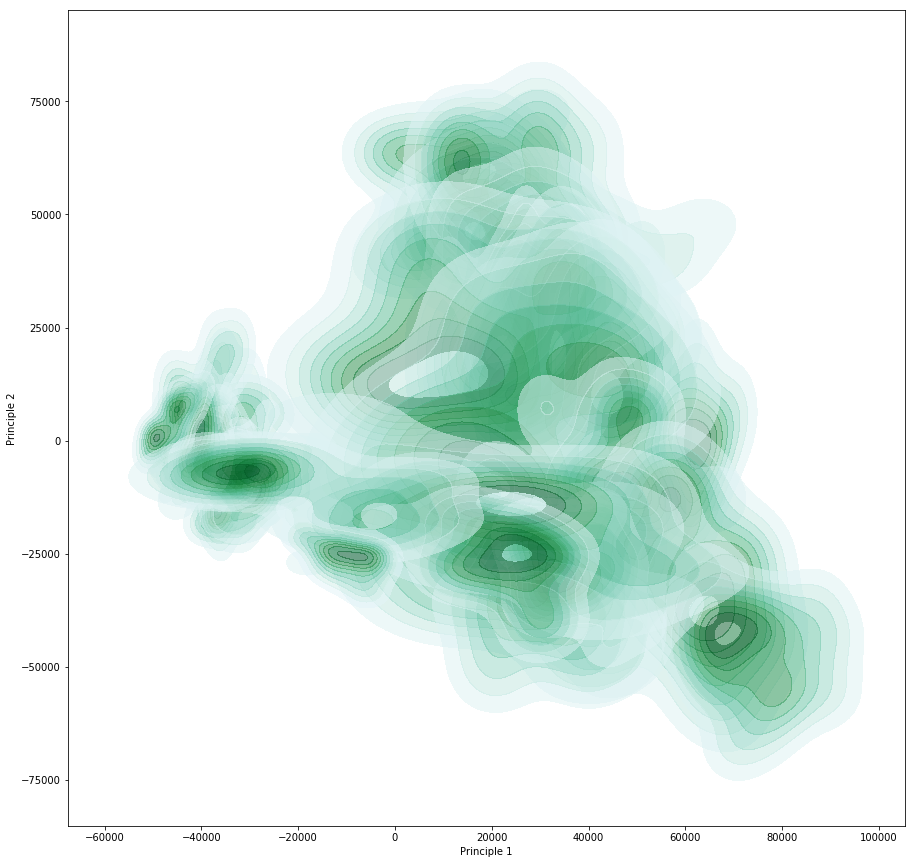

In [78]:
fig, ax = plt.subplots(figsize=(15,15))
#lda_plot(data_ldatrain,ax,contour=True,alpha=0.5)
#lda_plot(data_ldatest,ax,contour=True,alpha=0.5)
lda_plot(data1, ax=ax,alpha=0.5)

#add_legend(ax)


#lda_plot(data1,ax,marker="x")

plt.show()